In [30]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy

The relationship between the discreet and continuous distributions is important because we sometimes need/want to transform our data between the two. 

One example from real life is your GPA - when you do assignments/exams, you end up with a raw percentage grade which is continuous. When this is converted to a letter scale (A, B, etc...), that letter scale is discreet - there's only a selection of possible values (b-,b,b+, etc...). This is binning. We take a continuous varaible and create a discreet variable from it. 
The other example is when your GPA is caclulated - those discreet values are assigned numbers on a 1-4 scale, then averaged together creating a new continuous value - your GPA.

One place where this is commonly used is lending and credit scores. Having a credit score of 752 vs 764 makes no difference, you're placed in a category of "excellent", "very good", etc...


In [31]:
#Load data
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
#Create credit-score bucket.
df["grade"] = " "
scoreCol = df.columns.get_loc("fico")
gradeCol = df.columns.get_loc("grade")

for i in range(len(df)) :
    if df.iloc[i,scoreCol] < 580:
        #print("Less than 580-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "subprime"
    elif df.iloc[i,scoreCol] < 670:
        #print("580-670-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "fair"
    elif df.iloc[i,scoreCol] < 740:
        #print("670-740-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "good"
    elif df.iloc[i,scoreCol] < 800:
        #print("740-800-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "very good"
    else:
        #print("800+-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "excellent"
#print(str(scoreCol)+ " "+ str(gradeCol))
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,grade
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,fair


In [24]:
#In generic cases, we can automate this:
# Does the same thing as the above 
#This is the opposite of KDE/smooting
bins = np.arange(580, 860, 60) # define cut offs for all the scores
bins = np.array([580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), len(group), np.exp(group["log.annual.inc"]).mean())

1 612 1341 60231.432107263354
2 672 6007 67593.95498610557
3 742 2085 74025.49061873481
4 802 145 96581.13203052751


In [25]:
#Graph
#hist2 = thinkstats2.Hist(round(df["fico"], -1))
hist2 = thinkstats2.Hist(df["fico"])
pmf2 = thinkstats2.Pmf(df["fico"])
cdf2 = thinkstats2.Cdf(df["fico"])

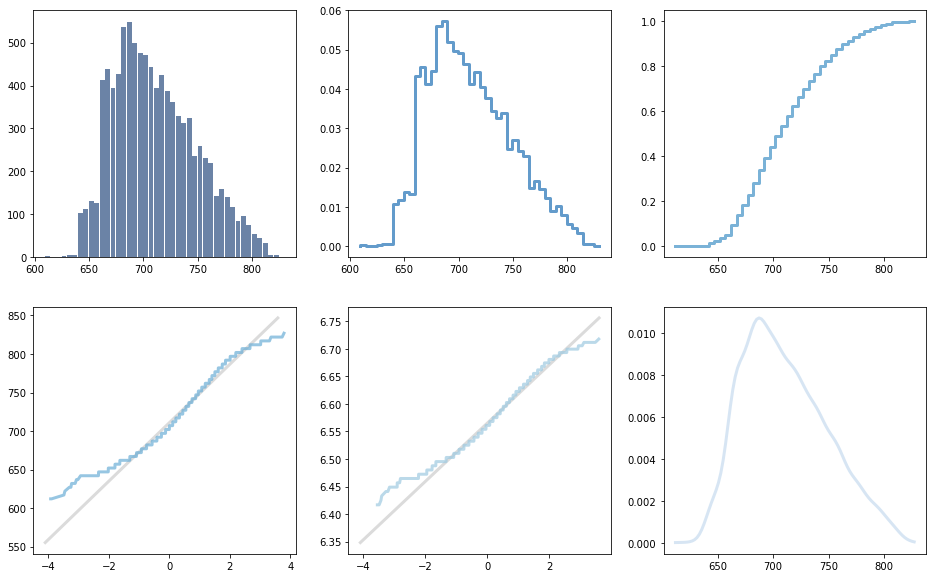

In [26]:
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df["fico"])
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df["fico"]))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df["fico"]) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

C:\Users\Yoges\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yoges\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


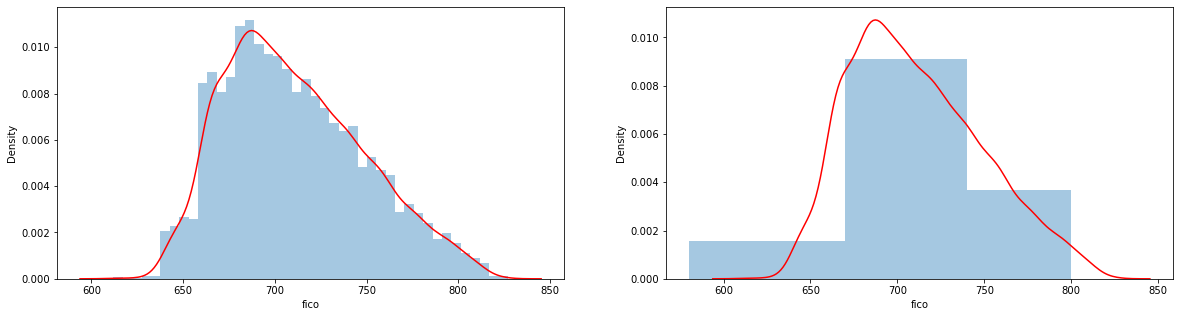

In [27]:
#We can use fancy graphs (more next chapter) to make it pretty
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5) #makes the default size larger. 
#Everything after the comma is optional. 
fig, ax = plt.subplots(1,2)
sns.distplot(df["fico"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
sns.distplot(df["fico"], bins=bins, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
plt.show()

Left is KDE, Right is PDF

As above - the KDE produces a smoothed function, and approximates the distribution of the histogram.

The smaller those bins get, the closer of an approximation. The smoothing factor accounts for 'noise' - e.g. around 750ish. 


Skewness. We can visually see the skew - this one is right skewed a bit - the right side is "stretched" out a bit more. We can verify with caclculations...

In [28]:
#Skew
skw = thinkstats2.PearsonMedianSkewness(df["fico"])
print(df["fico"].mean())
print(df["fico"].median())
print(skw)

710.8463144706619
707.0
0.30390788935426843


If mean is bigger than median, then swewed to right. If mean is smaller than median, than data is skewed to the left. If data is skewed we might need to treat data differently. Mean is not a great indicator. 

We can show it a little more clearly on the graph by adding some reference lines for mean and median.

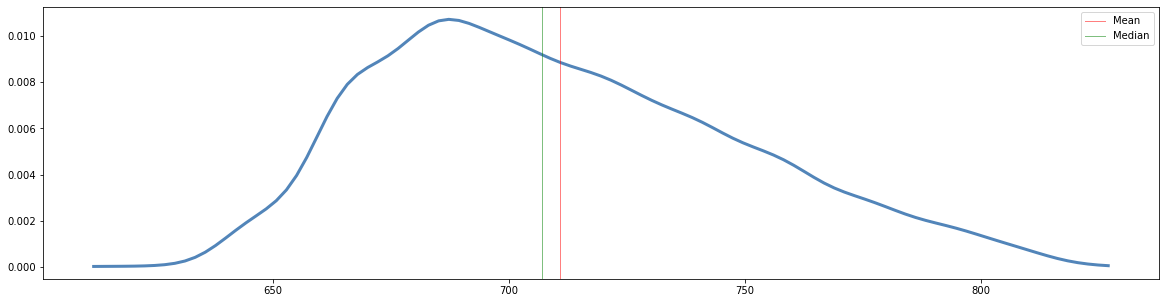

In [29]:
thinkplot.PrePlot(1)
thinkplot.Pdf(pdf)
thinkplot.axvline(df["fico"].mean(), color="Red", label="Mean")
thinkplot.axvline(df["fico"].median(), color="Green", label="Median")
thinkplot.Config()

We can explore a different varaible similarly - income. 

We are given the income in log format. Why might that be? Can you investigate a little, and add normal income to the dataframe?

In [35]:
#create a new column - income. This should show the regular income, not log transformed. 
#Make column
#Exponent the income
#Put values in the new column

df["income"] = np.exp(df["log.annual.inc"])

#tmp = pd.Series(np.exp(df["log.annual.inc"]))
#df["income"]
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636


In [46]:
#Challenge - try to create a function that makes the suite of 6 graphs above.

def bigGraph(data, columnName):
    dat = pd.Series(data[columnName])
   #Set obkects for graphs
    hist = thinkstats2.Hist(dat)
    pmf = thinkstats2.Pmf(dat)
    cdf = thinkstats2.Cdf(dat)
    pdf=thinkstats2.EstimatedPdf(dat)

    #Create graphs
    thinkplot.PrePlot(6, rows = 2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(dat)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(dat))
    thinkplot.SubPlot(6)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

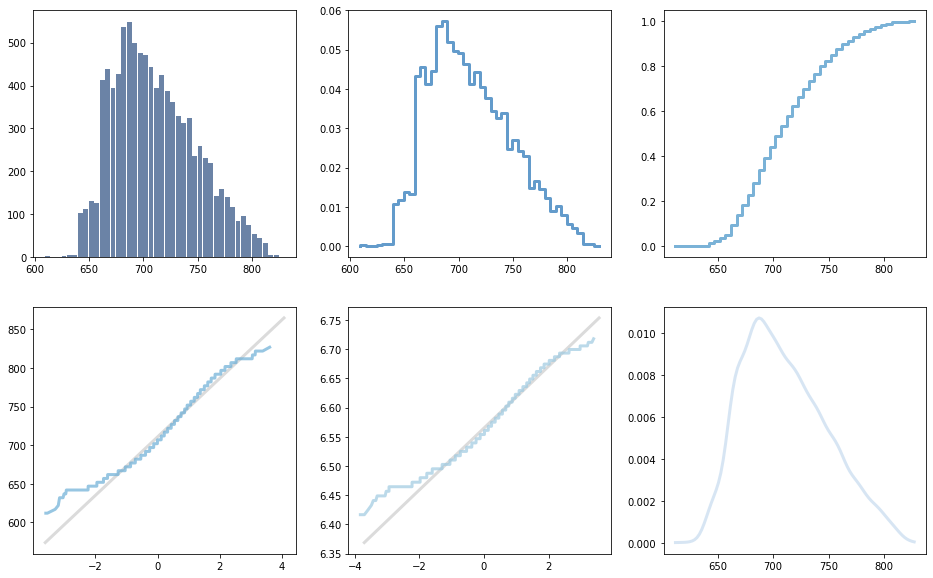

In [47]:
#Graph - If function wasn't created. 

bigGraph(df,"fico")

In [13]:
#Create graphs

In [49]:
#Try to use the data - break into groups of marginal tax rates:
#15% on the first $49,020 of taxable income, plus
#20.5% on the next $49,020 of taxable income (on the portion of taxable income over 49,020 up to $98,040), plus
#26% on the next $53,939 of taxable income (on the portion of taxable income over $98,040 up to $151,978), plus
#29% on the next $64,533 of taxable income (on the portion of taxable income over 151,978 up to $216,511), plus
#33% of taxable income over $216,511

incomeBuckets = [49020, 98040, 151878, 216511]
indx = np.digitize(df["income"], incomeBuckets, right=True)
taxGroups = df.groupby(indx)

In [15]:
#Create the 6 graph set of graphs for original log income

In [51]:
#Use the data to estimate the number of people in each tax bracket

for i, group in taxGroups: 
    print(i, str(len(group)) + " ", group["income"].mean())


0 3842  33676.13357878737
1 4206  68377.60314278367
2 1096  118291.30739083061
3 261  179094.59077441762
4 173  357131.7053245144


In [57]:
#Use the cdf to estimate the number of people who earn Teacher Money - lowest: 59,357, highest: 101,162
#make cdf
#calculate % under low num
#  calc % under high num
# subtract low from high
#mult by 100 for percent, * by total people for count

cdfTeach = thinkstats2.Cdf(df["income"])
low = cdfTeach.Prob(59357)
high = cdfTeach.Prob(101162)
#low, high
teacherMoneyPercent = high-low
round(teacherMoneyPercent*len(df), 0)

3144.0

In [62]:
def peopleInIncomeRange(data, highIncome, lowIncome, incomeColumnName) : 

    cdfTeach = thinkstats2.Cdf(data[incomeColumnName])
    low = cdfTeach.Prob(lowIncome)
    high = cdfTeach.Prob(highIncome)
#low, high
    teacherMoneyPercent = high-low
    answer = round(teacherMoneyPercent*len(df), 0)
    return answer

In [63]:
peopleInIncomeRange(df,179000,48234, "income")
#make sure inputs are in order of the defined function.

5492.0

In [18]:
#Create a KDE showing the distributiion of income.
#Try both log income, and raw income. 

In [19]:
#Challenge - Create a function that takes an income and returns a tax bill, and marginal tax rate:
def muhTaxes(income):
    return taxbill, margRate